## Tip for running multiple code cells
A useful tool when running code in Colaboratory is the **Runtime tab**. Clicking on this tab will open a menu with various options that will allow you to run multiple code cells simultaneously. For example, "Run before" will run all the code cells before the currently selected cell in order starting with the first. This is particularly helpful if you run into an error while editing your code and you want to ensure all the variables and data have been initialized properly prior to the cell you're working on.

# Load libraries and dataset

**Documentation:**

[Python 3 Documentation](https://docs.python.org/3/tutorial/index.html)

[Numpy Documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html)

[Keras Documentation](https://keras.io/)


In [1]:
# Import Numpy, Matplotlib, and Keras Data Science libraries to perform most of the heavy lifting for us
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import load_model
from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical
from google.colab import files

Using TensorFlow backend.


**[CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html):**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

In [2]:
# Load the CIFAR-10 dataset from Keras
# Split dataset into testing, traing, features, and labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 56s 0us/step


# Exploratory Analysis

In [3]:
# Display the size and shape of features, labels, training, and testing datasets
print("Size and shape of the training features are (training data size, image width, image height, image color depth): {}".format(x_train.shape))
print("Size and shape of the training labels are (training data size, class label): {}".format(y_train.shape))
print("Size and shape of the testing features are (testing data size, image width, image height, image color depth): {}".format(x_test.shape))
print("Size and shape of the testing labels are (testing data size, class label): {}".format(y_test.shape))

Size and shape of the training features are (training data size, image width, image height, image color depth): (50000, 32, 32, 3)
Size and shape of the training labels are (training data size, class label): (50000, 1)
Size and shape of the testing features are (testing data size, image width, image height, image color depth): (10000, 32, 32, 3)
Size and shape of the testing labels are (testing data size, class label): (10000, 1)


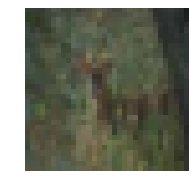

In [4]:
# This samples the 10-th image from the training dataset.
index = 10 # change this value to see another image
image = x_train[index]

# Display the image and its label.
plt.figure(figsize=(3,3)) # Initialzie the size of the plot frame
plt.imshow(image); plt.grid('off');plt.axis('off') # Feed image values to plot
plt.show() # Generate plot onto screen

# Data Preprocessing

In [0]:
# Specify the number of class labels in our data
num_classes = 10

# Keep original labels
labels_test = y_test

# Labels are stored as unique integers
# Convert labeles into unique one-hot encodings of length num_class
# Each label will then be converted to a series of zeros with one unique column containing a one for a unique label
# example 10000000000 or 0001000000, etc
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
# Our input data is pixels from images where each pixel value is between ranges 0-255
# Range of values make it difficult for our network to learn
# Convert raw pixel values into values between 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 250.0
x_test /= 250.0

In [7]:
# Display the size and shape of features, labels, training, and testing datasets
print("Size and shape of the training features are (training data size, image width, image height, image color depth): {}".format(x_train.shape))
print("Size and shape of the training labels are (training data size, class label): {}".format(y_train.shape))
print("Size and shape of the testing features are (testing data size, image width, image height, image color depth): {}".format(x_test.shape))
print("Size and shape of the testing labels are (testing data size, class label): {}".format(y_test.shape))

Size and shape of the training features are (training data size, image width, image height, image color depth): (50000, 32, 32, 3)
Size and shape of the training labels are (training data size, class label): (50000, 10)
Size and shape of the testing features are (testing data size, image width, image height, image color depth): (10000, 32, 32, 3)
Size and shape of the testing labels are (testing data size, class label): (10000, 10)


# Model Building

In [0]:
# Forward-Feed Neural Network Layer
class ForwardLayer(tf.keras.Model):
  
    # Initialize our variables
    def __init__(self, size, dropout_rate):
        super(ForwardLayer, self).__init__()
        self.size = size
        self.dropout_rate = dropout_rate
        
    # Define our layers
    def build(self, input_shape):
        self.dense = tf.keras.layers.Dense(self.size, input_shape=input_shape)
        self.batchnorm = tf.keras.layers.BatchNormalization()
        self.dropout = tf.keras.layers.Dropout(self.dropout_rate)
    
    # Computation of network layers
    def call(self, inputs):
        x = self.dense(inputs)
        x = self.batchnorm(x)
        x = tf.nn.relu(x)
        x = self.dropout(x)
        return x
      
    # Define output shape
    def compute_output_shape(self, input_shape):
      return (input_shape[0], self.size)

In [0]:
# Initialize our network object
net = tf.keras.Sequential()
train = False # Freeze the Convolutional Blocks from being trained

# Convolutional Block One
net.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', input_shape=(32,32,3), trainable=train, name='conv_1'))
net.add(tf.keras.layers.BatchNormalization(trainable=train, name='bn_2'))
net.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid', trainable=train, name='maxpl_3'))
net.add(tf.keras.layers.Dropout(0.3, trainable=train, name='drp_4'))
   
# Convolutional Block Two
net.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', trainable=train, name='conv_5'))
net.add(tf.keras.layers.BatchNormalization(trainable=train, name='bn_6'))
net.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid', trainable=train, name='maxpl_7'))
net.add(tf.keras.layers.Dropout(0.3, trainable=train, name='drp_8'))

# Convolutional Block Three
net.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', trainable=train, name='conv_9'))
net.add(tf.keras.layers.BatchNormalization(trainable=train, name='bn_10'))
net.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid', trainable=train, name='maxpl_11'))
net.add(tf.keras.layers.Dropout(0.2, trainable=train, name='drp_12'))

# Flatten
net.add(tf.keras.layers.Flatten(name='flt_13'))

# Dense Block Four
#net.add(tf.keras.layers.Dense(64, name='dense_14'))
#net.add(tf.keras.layers.BatchNormalization(name='bn_15'))
#net.add(tf.keras.layers.Dropout(0.1, name='drp_16'))
net.add(ForwardLayer(64, 0.1))

# Dense Block Five
#net.add(tf.keras.layers.Dense(32)) #, name='dense_17'))
#net.add(tf.keras.layers.BatchNormalization()) #name='bn_18'))
#net.add(tf.keras.layers.Dropout(0)) #, name='drp_19'))
net.add(ForwardLayer(32, 0))

# Output Block
net.add(tf.keras.layers.Dense(num_classes, activation='softmax')) #, name='out_20'))

In [0]:
# The compile function will build our model by using the defined loss, optimization, and metric parameters
net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load Pre-Trained Weights

To get access to the predefined weight file you can download it [here](https://drive.google.com/open?id=1ZPUGlYmdx57QfgcJMqpDxNfFWdpqTbe_).

In [11]:
# Load the pretrained_weights.h5 file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving pretrained_weights (1).h5 to pretrained_weights (1).h5
User uploaded file "pretrained_weights (1).h5" with length 241784 bytes


In [12]:
# File loads the weights for the pretrained convolutional network (allows us to focus on the forward-feed dense layers for faster training times)
net.load_weights('pretrained_weights.h5', by_name=True)

OSError: ignored

In [13]:
# View the model before we train it
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 30, 30, 32)        128       
_________________________________________________________________
maxpl_3 (MaxPooling2D)       (None, 15, 15, 32)        0         
_________________________________________________________________
drp_4 (Dropout)              (None, 15, 15, 32)        0         
_________________________________________________________________
conv_5 (Conv2D)              (None, 13, 13, 32)        9248      
_________________________________________________________________
bn_6 (BatchNormalization)    (None, 13, 13, 32)        128       
_________________________________________________________________
maxpl_7 (MaxPooling2D)       (None, 6, 6, 32)          0         
__________

# Train Model

In [14]:
# Use the fit function to give the network the training features, training labels, batch size, number of epochs to train, validation split size
net.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 50s 1ms/step - loss: 1.4224 - acc: 0.4992 - val_loss: 1.4956 - val_acc: 0.4788
Epoch 2/3
40000/40000 [==============================] - 49s 1ms/step - loss: 1.2477 - acc: 0.5590 - val_loss: 1.4483 - val_acc: 0.4934
Epoch 3/3
40000/40000 [==============================] - 49s 1ms/step - loss: 1.2131 - acc: 0.5726 - val_loss: 1.4532 - val_acc: 0.4974


# Test Model Performance

In [15]:
# Use the networks evaluate function to see how well the model predicts the correct labels on the testing dataset
scores = net.evaluate(x_test, y_test, verbose=0)

# Report the final accuracy score
print('Test Loss:', scores[0])
print('Test accuracy:', scores[1])

Test Loss: 1.455889953994751
Test accuracy: 0.4926


# Applications

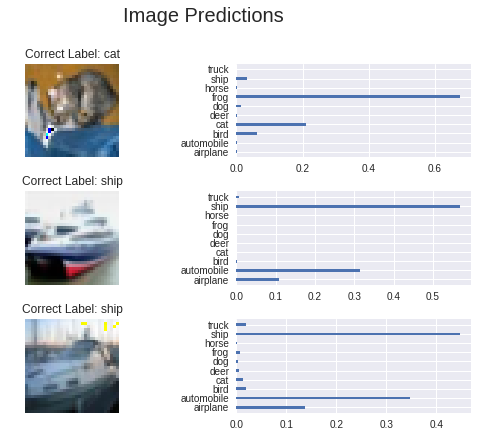

In [16]:
# Create plot and parameters to layout our images and predictions
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num = 3
margin = 0.05
ind = np.arange(len(labels))
width = (1. - 2. * margin) / num

fig, ax = plt.subplots(nrows=num, ncols=2)
fig.tight_layout()
fig.suptitle('Image Predictions', fontsize=20, y=1.1)

# Loop through each image to plot and make a prediction
for i in range(num):
  image = x_test[i]
  label = labels[labels_test[i][0]]
  x = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
  pred = net.predict(x, batch_size=None, verbose=0, steps=None).flatten()

  # Display image and correct label
  ax[i][0].imshow(image.squeeze())
  ax[i][0].set_title("Correct Label: {}".format(label))
  ax[i][0].set_axis_off()
  
  # Display the predicted confidence in each label
  ax[i][1].barh(ind + margin, pred, width)
  ax[i][1].set_yticks(ind + margin)
  ax[i][1].set_yticklabels(labels)

# Save Model

In [0]:
# Saves your trained model for use later
net.save_weights('cifar_final_weights.h5') # Saves just the weights (like we did earlier)

In [0]:
# Download the files to local computer drive
files.download('cifar_final_weights.h5')

# Reflection and Analysis

1.  What was the accuracy of your final model? 

2.  Did the training, validation, and testing accuracy differ significantly at the end of training?

3. About how long did it take to train your final model?

4.  What factors did you consider when you built your model? 

5.  What parameters did you play around with and consider? Did you notice any significant changes when you changed this parameter? What was the overall affect of the model's performance?

6.  If you had more time do you think you could have produced a better model? If so what would you play around or experiment with in order to determine this? If not what factors do you would prevent your model from being able to get a more accurate model of the data?

7. How do you think you can apply this model to everyday applications? How do you thing it could help serve society?
